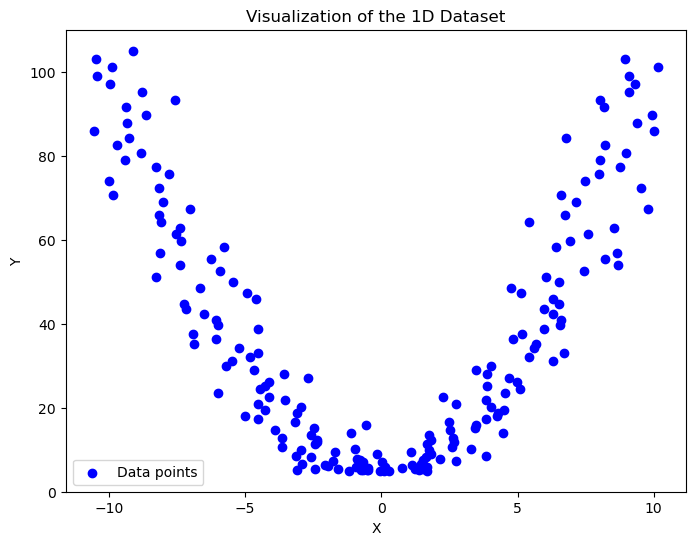

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("q4_dataset.csv")
X = data['X'].values
Y = data['Y'].values

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', marker='o', label='Data points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualization of the 1D Dataset")
plt.legend()
plt.show()


In [2]:
# Define a helper function to apply the quadratic basis transformation
def quadratic_basis(X):
    return np.vstack((np.ones(X.shape[0]), X, X**2)).T

# Split the dataset into training (80%) and testing (20%) sets
np.random.seed(0)  # For reproducibility
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
train_indices, test_indices = indices[:train_size], indices[train_size:]

X_train, Y_train = X[train_indices], Y[train_indices]
X_test, Y_test = X[test_indices], Y[test_indices]

# Transform features using the quadratic basis function
X_train_basis = quadratic_basis(X_train)
X_test_basis = quadratic_basis(X_test)

# Train the linear regression model using the normal equation
# theta = (X^T X)^(-1) X^T Y
theta = np.linalg.inv(X_train_basis.T @ X_train_basis) @ X_train_basis.T @ Y_train

# Make predictions on the test set
Y_test_pred = X_test_basis @ theta

# Compute Mean Squared Error (MSE)
mse = np.mean((Y_test - Y_test_pred)**2)

print(f"Mean Squared Error on the Test Set: {mse:.4f}")

Mean Squared Error on the Test Set: 112.7838


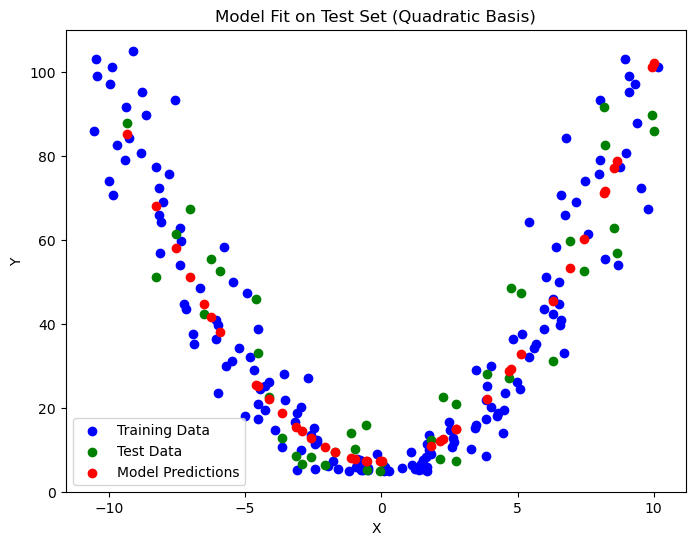

In [3]:
# Plot the training data, test data, and model predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='green', label='Test Data')
plt.scatter(X_test, Y_test_pred, color='red', label='Model Predictions')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Model Fit on Test Set (Quadratic Basis)")
plt.legend()
plt.show()